In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report
import scipy.stats as stats
import pylab
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/Data/Mortality Extract -pse2.xlsx"

In [ ]:
df_Mor = pd.read_excel(path,"Sheet1")

In [ ]:
df_Mor.describe()

,SK_PatientID,Gender,Age,IP12M,IPHIST,AE12M,OP12M,Waiting list - prioritised OP,Waiting list - unprioritised OP,Diabetic OP,Cancer OP,Social Community,Readmission model,Readmission likelihood,Unnamed: 15,Ace,AF,Alcohol,Antagonist,Anticoag,Asthma,B12,Beta,BloodTest,BMI,BoneSparing,BP,Breathlessness,Calcium,Cancer,CardioVasc,Cervical,CervixRemoval,CHD,Cholesterol,CKD,Clopidogrel,Contraception,COPD,Dementia,...,DXA,Echocardiogram,Epilepsy,FEV1,FluVacc,FolateTests,Foot,Fracture,HF,Hypertension,IFCC,LiverTest,LVSD,MHealth,MicroAlb,MRI,Neuropathy,Osteoporosis,OTCsalic,OxygenSat,PAD,Palliative,PEFR,Pharmaco,Proteinuria,Renal,RheumArth,Salicylate,SerumChol,SerumCreat,SerumFructo,SerumLithium,Smoker,Statin,Stroke,Thyroid,TIA,TSH,Died_Status,MORT_RISK
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,1.0,0.0,1.0,1.0,1.0,1.0,1.00,1.00,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000
mean,5000.50000,2.500200,38.788200,0.255200,0.554600,0.264100,2.21390,2.0,NaN,0.3,0.5,2.0,3.0,0.66,1.98,0.00830,0.013300,0.604900,0.004000,0.008000,0.115800,0.270100,0.00580,0.585400,0.684100,0.000900,0.6856,0.022100,0.3513,0.033400,0.246400,0.300300,0.014700,0.0184,0.397300,0.02130,0.006400,0.079600,0.030500,0.008700,...,0.003900,0.072600,0.009000,0.049100,0.373300,0.257000,0.045800,0.005300,0.005700,0.103400,0.355000,0.523400,0.002000,0.012800,0.003000,0.095900,0.004200,0.015800,0.014400,0.081500,0.003100,0.007200,0.055100,0.0184,0.001400,0.542700,0.006400,0.01030,0.018800,0.532400,0.000400,0.001700,0.755800,0.002400,0.020000,0.484500,0.004500,0.484600,0.0,0.005862
std,2886.89568,0.500425,21.644482,1.936091,3.979071,0.891084,6.34435,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.09073,0.114562,0.488897,0.063122,0.089089,0.320001,0.444033,0.07594,0.492677,0.464897,0.029988,0.4643,0.147016,0.4774,0.179688,0.430936,0.458411,0.120355,0.1344,0.489364,0.14439,0.079748,0.270686,0.171967,0.092872,...,0.062331,0.259492,0.094445,0.216088,0.483705,0.437001,0.209062,0.072612,0.075287,0.304496,0.478537,0.499477,0.044679,0.112416,0.054693,0.294469,0.064674,0.124707,0.119139,0.273615,0.055594,0.084551,0.228187,0.1344,0.037392,0.498198,0.079748,0.10097,0.135825,0.498974,0.019997,0.041198,0.429633,0.048933,0.140007,0.499785,0.066934,0.499788,0.0,0.022700
min,1.00000,2.000000,0.000000,0.000000,0.000000,0.000000,0.00000,2.0,NaN,0.3,0.5,2.0,3.0,0.66,1.98,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,2500.75000,2.000000,23.000000,0.000000,0.000000,0.000000,0.00000,2.0,NaN,0.3,0.5,2.0,3.0,0.66,1.98,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.0000,0

In [ ]:
Mor1 = df_Mor.drop(['Waiting list - prioritised OP','Waiting list - unprioritised OP','Diabetic OP','Cancer OP','Social Community','Readmission model','Readmission likelihood','Unnamed: 15'],axis = 1)

In [ ]:
Mor1.describe()

,SK_PatientID,Gender,Age,IP12M,IPHIST,AE12M,OP12M,Ace,AF,Alcohol,Antagonist,Anticoag,Asthma,B12,Beta,BloodTest,BMI,BoneSparing,BP,Breathlessness,Calcium,Cancer,CardioVasc,Cervical,CervixRemoval,CHD,Cholesterol,CKD,Clopidogrel,Contraception,COPD,Dementia,Depression,Diabetes,Dipyridamole,DXA,Echocardiogram,Epilepsy,FEV1,FluVacc,FolateTests,Foot,Fracture,HF,Hypertension,IFCC,LiverTest,LVSD,MHealth,MicroAlb,MRI,Neuropathy,Osteoporosis,OTCsalic,OxygenSat,PAD,Palliative,PEFR,Pharmaco,Proteinuria,Renal,RheumArth,Salicylate,SerumChol,SerumCreat,SerumFructo,SerumLithium,Smoker,Statin,Stroke,Thyroid,TIA,TSH,Died_Status,MORT_RISK
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000
mean,5000.50000,2.500200,38.788200,0.255200,0.554600,0.264100,2.21390,0.00830,0.013300,0.604900,0.004000,0.008000,0.115800,0.270100,0.00580,0.585400,0.684100,0.000900,0.6856,0.022100,0.3513,0.033400,0.246400,0.300300,0.014700,0.0184,0.397300,0.02130,0.006400,0.079600,0.030500,0.008700,0.102200,0.048200,0.003600,0.003900,0.072600,0.009000,0.049100,0.373300,0.257000,0.045800,0.005300,0.005700,0.103400,0.355000,0.523400,0.002000,0.012800,0.003000,0.095900,0.004200,0.015800,0.014400,0.081500,0.003100,0.007200,0.055100,0.0184,0.001400,0.542700,0.006400,0.01030,0.018800,0.532400,0.000400,0.001700,0.755800,0.002400,0.020000,0.484500,0.004500,0.484600,0.0,0.005862
std,2886.89568,0.500425,21.644482,1.936091,3.979071,0.891084,6.34435,0.09073,0.114562,0.488897,0.063122,0.089089,0.320001,0.444033,0.07594,0.492677,0.464897,0.029988,0.4643,0.147016,0.4774,0.179688,0.430936,0.458411,0.120355,0.1344,0.489364,0.14439,0.079748,0.270686,0.171967,0.092872,0.302926,0.214199,0.059895,0.062331,0.259492,0.094445,0.216088,0.483705,0.437001,0.209062,0.072612,0.075287,0.304496,0.478537,0.499477,0.044679,0.112416,0.054693,0.294469,0.064674,0.124707,0.119139,0.273615,0.055594,0.084551,0.228187,0.1344,0.037392,0.498198,0.079748,0.10097,0.135825,0.498974,0.019997,0.041198,0.429633,0.048933,0.140007,0.499785,0.066934,0.499788,0.0,0.022700
min,1.00000,2.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,2500.75000,2.000000,23.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

In [ ]:
Mor1.head(5)

,SK_PatientID,Gender,Age,GP_PRACTICE,IP12M,IPHIST,AE12M,OP12M,Ace,AF,Alcohol,Antagonist,Anticoag,Asthma,B12,Beta,BloodTest,BMI,BoneSparing,BP,Breathlessness,Calcium,Cancer,CardioVasc,Cervical,CervixRemoval,CHD,Cholesterol,CKD,Clopidogrel,Contraception,COPD,Dementia,Depression,Diabetes,Dipyridamole,DXA,Echocardiogram,Epilepsy,FEV1,FluVacc,FolateTests,Foot,Fracture,HF,Hypertension,IFCC,LiverTest,LVSD,MHealth,MicroAlb,MRI,Neuropathy,Osteoporosis,OTCsalic,OxygenSat,PAD,Palliative,PEFR,Pharmaco,Proteinuria,Renal,RheumArth,Salicylate,SerumChol,SerumCreat,SerumFructo,SerumLithium,Smoker,Statin,Stroke,Thyroid,TIA,TSH,Died_Status,MORT_RISK
0,1,3,98,H85111,24,9,11,12,0,0,1,0,0,1,0,0,1,1,1,1,1,1,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,1,0,1,1,0,0,1,1,1,0,1,0,0,0,1,0,1,0,1,0,1,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,1,0,0.635857
1,2,3,77,H85116,13,5,0,16,0,0,1,0,0,1,1,0,1,1,0,1,1,1,1,1,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,1,0,1,0,0,1,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,0,1,1,0,1,0,0.414805
2,3,3,94,H85020,0,15,0,25,1,1,1,1,1,0,1,0,1,1,1,1,0,1,0,0,1,0,0,1,1,1,0,0,1,0,1,1,0,1,0,0,1,1,1,1,1,1,1,1,1,0,1,0,0,1,0,1,0,1,0,0,0,1,0,1,1,1,0,0,1,0,1,1,0,1,0,0.397581
3,4,2,72,H85041,57,14,0,41,0,0,1,0,0,0,1,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0,0,1,1,1,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,1,0,1,0,0.379220
4,5,2,81,H85078,24,45,2,32,1,0,1,0,0,1,1,1,1,1,0,1,0,1,1,0,0,0,1,1,1,0,0,0,1,0,1,0,0,1,0,1,1,1,1,0,0,1,1,1,0,0,0,1,0,0,0,1,0,1,1,0,0,1,0,0,1,1,0,0,1,0,0,1,0,1,0,0.358592


In [ ]:
Mor1["SK_PatientID"].describe()

count    10000.00000
mean      5000.50000
std       2886.89568
min          1.00000
25%       2500.75000
50%       5000.50000
75%       7500.25000
max      10000.00000
Name: SK_PatientID, dtype: float64

In [ ]:
Mor1["Gender"].describe()

count    10000.000000
mean         2.500200
std          0.500425
min          2.000000
25%          2.000000
50%          2.500000
75%          3.000000
max          4.000000
Name: Gender, dtype: float64

In [ ]:
Mor1["Age"].describe()

count    10000.000000
mean        38.788200
std         21.644482
min          0.000000
25%         23.000000
50%         38.000000
75%         54.000000
max        105.000000
Name: Age, dtype: float64

In [ ]:
Mor1["GP_PRACTICE"].describe()

count      10000
unique       180
top       Y02423
freq         235
Name: GP_PRACTICE, dtype: object

In [ ]:
Mor1["IP12M"].describe()

count    10000.000000
mean         0.255200
std          1.936091
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        114.000000
Name: IP12M, dtype: float64

In [ ]:
Mor1["IPHIST"].describe()

count    10000.000000
mean         0.554600
std          3.979071
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        328.000000
Name: IPHIST, dtype: float64

In [ ]:
Mor1["AE12M"].describe()

count    10000.000000
mean         0.264100
std          0.891084
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         31.000000
Name: AE12M, dtype: float64

In [ ]:
Mor1["OP12M"].describe()

count    10000.00000
mean         2.21390
std          6.34435
min          0.00000
25%          0.00000
50%          0.00000
75%          1.00000
max        143.00000
Name: OP12M, dtype: float64

In [ ]:
Mor1.count(1)

0       76
1       76
2       76
3       76
4       76
        ..
9995    76
9996    76
9997    76
9998    76
9999    76
Length: 10000, dtype: int64

In [ ]:
Mor1.count()

SK_PatientID    10000
Gender          10000
Age             10000
GP_PRACTICE     10000
IP12M           10000
                ...  
Thyroid         10000
TIA             10000
TSH             10000
Died_Status     10000
MORT_RISK       10000
Length: 76, dtype: int64

In [ ]:
Mor1.head(2)

,SK_PatientID,Gender,Age,GP_PRACTICE,IP12M,IPHIST,AE12M,OP12M,Ace,AF,Alcohol,Antagonist,Anticoag,Asthma,B12,Beta,BloodTest,BMI,BoneSparing,BP,Breathlessness,Calcium,Cancer,CardioVasc,Cervical,CervixRemoval,CHD,Cholesterol,CKD,Clopidogrel,Contraception,COPD,Dementia,Depression,Diabetes,Dipyridamole,DXA,Echocardiogram,Epilepsy,FEV1,FluVacc,FolateTests,Foot,Fracture,HF,Hypertension,IFCC,LiverTest,LVSD,MHealth,MicroAlb,MRI,Neuropathy,Osteoporosis,OTCsalic,OxygenSat,PAD,Palliative,PEFR,Pharmaco,Proteinuria,Renal,RheumArth,Salicylate,SerumChol,SerumCreat,SerumFructo,SerumLithium,Smoker,Statin,Stroke,Thyroid,TIA,TSH,Died_Status,MORT_RISK
0,1,3,98,H85111,24,9,11,12,0,0,1,0,0,1,0,0,1,1,1,1,1,1,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,1,0,1,1,0,0,1,1,1,0,1,0,0,0,1,0,1,0,1,0,1,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,1,0,0.635857
1,2,3,77,H85116,13,5,0,16,0,0,1,0,0,1,1,0,1,1,0,1,1,1,1,1,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,1,0,1,0,0,1,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,0,1,1,0,1,0,0.414805


In [ ]:
#Gender EDA

(array([5.000e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 4.998e+03,
        0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00]),
 array([2. , 2.2, 2.4, 2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. ]),
 <a list of 10 Patch objects>)

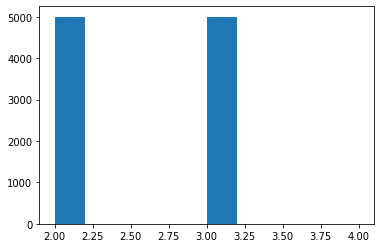

In [ ]:
plt.hist(Mor1.Gender)

{'boxes': [<matplotlib.lines.Line2D at 0x7fb06f67d450>],
 'caps': [<matplotlib.lines.Line2D at 0x7fb06ee47850>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb06f104fd0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fb06f104cd0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fb06f67d1d0>,
  <matplotlib.lines.Line2D at 0x7fb06ee47ad0>]}

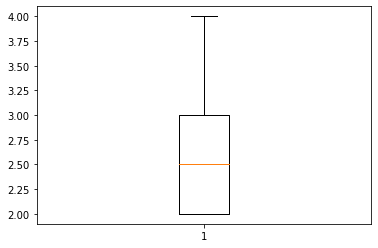

In [ ]:
plt.boxplot(Mor1.Gender)

((array([-3.81060943, -3.58545756, -3.46184782, ...,  3.46184782,
          3.58545756,  3.81060943]), array([2, 2, 2, ..., 3, 4, 4])),
 (0.3998993981708726, 2.5002, 0.7988738848711538))

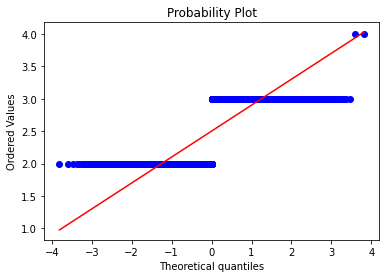

In [ ]:
# Checking Whether data is normally distributed
stats.probplot(Mor1.Gender, dist="norm",plot=pylab)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


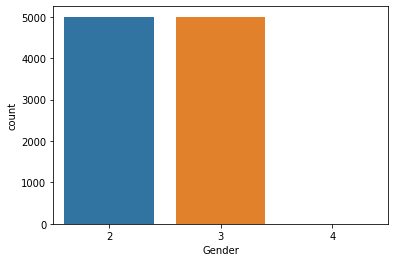

In [ ]:
import seaborn as sns
sns.countplot(Mor1['Gender'])

In [ ]:
Mor1['Gender'].value_counts()

2    5000
3    4998
4       2
Name: Gender, dtype: int64

(array([1165., 1025., 1648., 1865., 1680., 1135.,  773.,  451.,  219.,
          39.]),
 array([  0. ,  10.5,  21. ,  31.5,  42. ,  52.5,  63. ,  73.5,  84. ,
         94.5, 105. ]),
 <a list of 10 Patch objects>)

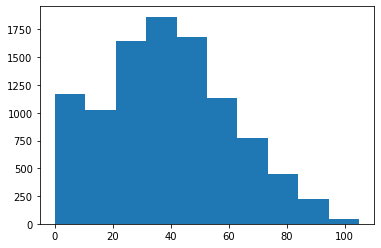

In [ ]:
plt.hist(Mor1.Age)

{'boxes': [<matplotlib.lines.Line2D at 0x7fb06e288e10>],
 'caps': [<matplotlib.lines.Line2D at 0x7fb06ec35e50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb06dce2410>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fb06e474450>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fb06ec35090>,
  <matplotlib.lines.Line2D at 0x7fb06ec355d0>]}

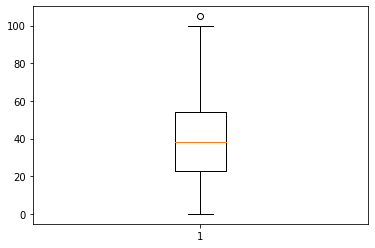

In [ ]:
plt.boxplot(Mor1.Age)

((array([-3.81060943, -3.58545756, -3.46184782, ...,  3.46184782,
          3.58545756,  3.81060943]),
  array([  0,   0,   0, ..., 100, 100, 105])),
 (21.45502614480261, 38.788199999999996, 0.9909418591150272))

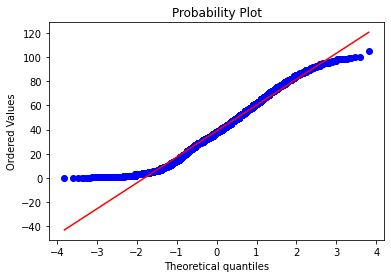

In [ ]:
stats.probplot(Mor1.Age, dist="norm",plot=pylab)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


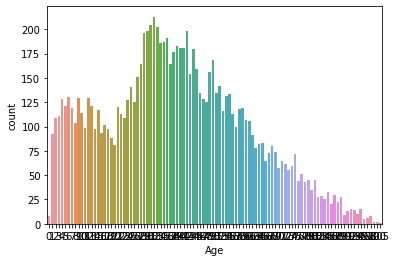

In [ ]:
sns.countplot(Mor1['Age'])

In [ ]:
Mor1['Age'].value_counts()

32     213
31     204
33     202
42     198
30     198
      ... 
97       6
96       5
99       2
100      2
105      1
Name: Age, Length: 102, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


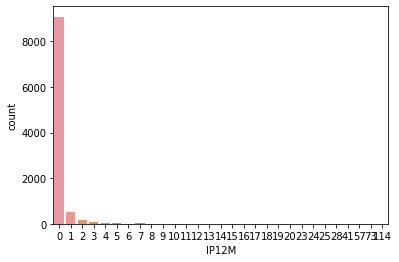

In [ ]:
sns.countplot(Mor1['IP12M'])

In [ ]:
Mor1['IP12M'].value_counts()

0      9081
1       505
2       186
3        74
4        50
5        23
7        16
6        13
13        7
10        7
9         5
8         4
12        3
11        3
15        3
14        3
20        2
17        2
18        2
24        2
16        1
23        1
25        1
41        1
57        1
73        1
19        1
28        1
114       1
Name: IP12M, dtype: int64

(array([9.967e+03, 2.400e+01, 5.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([  0. ,  11.4,  22.8,  34.2,  45.6,  57. ,  68.4,  79.8,  91.2,
        102.6, 114. ]),
 <a list of 10 Patch objects>)

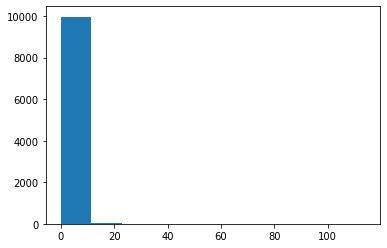

In [ ]:
plt.hist(Mor1.IP12M)

{'boxes': [<matplotlib.lines.Line2D at 0x7fb06ddcb1d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fb06eb7d8d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb06e0ac510>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fb06de1d290>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fb06e15dd90>,
  <matplotlib.lines.Line2D at 0x7fb06ee11950>]}

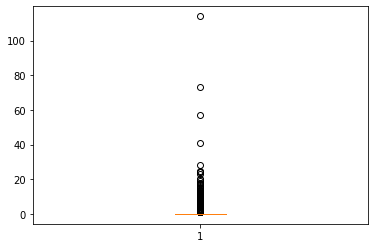

In [ ]:
plt.boxplot(Mor1.IP12M)

((array([-3.81060943, -3.58545756, -3.46184782, ...,  3.46184782,
          3.58545756,  3.81060943]),
  array([  0,   0,   0, ...,  57,  73, 114])),
 (0.6051624176117472, 0.2551999999999998, 0.3124730254912434))

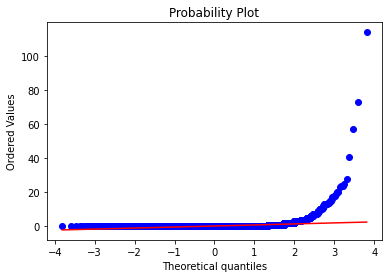

In [ ]:
stats.probplot(Mor1.IP12M, dist="norm",plot=pylab)

(array([9.995e+03, 3.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([  0. ,  32.8,  65.6,  98.4, 131.2, 164. , 196.8, 229.6, 262.4,
        295.2, 328. ]),
 <a list of 10 Patch objects>)

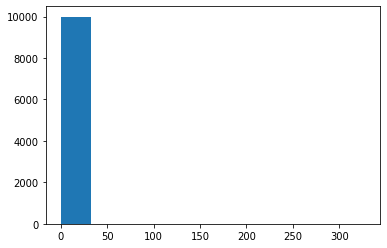

In [ ]:
plt.hist(Mor1.IPHIST)

{'boxes': [<matplotlib.lines.Line2D at 0x7fb06f0cb990>],
 'caps': [<matplotlib.lines.Line2D at 0x7fb06f098990>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb06f0959d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fb06f095490>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fb06f0cbed0>,
  <matplotlib.lines.Line2D at 0x7fb06f098450>]}

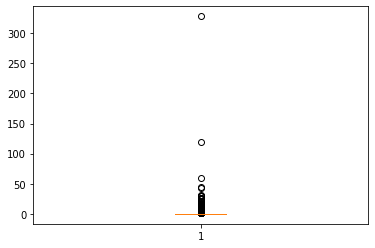

In [ ]:
plt.boxplot(Mor1.IPHIST)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


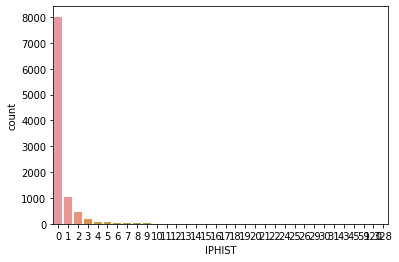

In [ ]:
sns.countplot(Mor1['IPHIST'])

In [ ]:
Mor1['IPHIST'].value_counts()

0      8013
1      1034
2       438
3       188
4        83
5        71
6        40
8        24
9        24
7        17
10       11
12        8
13        7
14        6
17        6
15        3
26        3
19        3
21        2
22        2
24        2
16        2
30        2
11        1
43        1
59        1
18        1
20        1
25        1
29        1
45        1
328       1
120       1
31        1
Name: IPHIST, dtype: int64

((array([-3.81060943, -3.58545756, -3.46184782, ...,  3.46184782,
          3.58545756,  3.81060943]),
  array([  0,   0,   0, ...,  59, 120, 328])),
 (1.150648562882362, 0.5545999999999996, 0.28908621392586714))

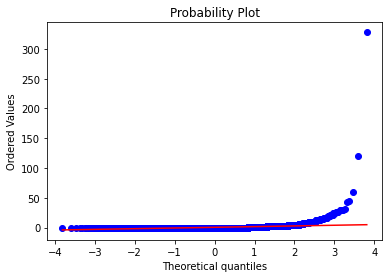

In [ ]:
stats.probplot(Mor1.IPHIST, dist="norm",plot=pylab)

(array([9.904e+03, 7.400e+01, 1.300e+01, 5.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00]),
 array([ 0. ,  3.1,  6.2,  9.3, 12.4, 15.5, 18.6, 21.7, 24.8, 27.9, 31. ]),
 <a list of 10 Patch objects>)

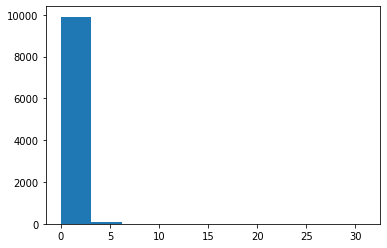

In [ ]:
plt.hist(Mor1.AE12M)

{'boxes': [<matplotlib.lines.Line2D at 0x7fb06e5d6150>],
 'caps': [<matplotlib.lines.Line2D at 0x7fb06e5e1150>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb06e5ed190>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fb06e5e1c10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fb06e5d6690>,
  <matplotlib.lines.Line2D at 0x7fb06e5d6bd0>]}

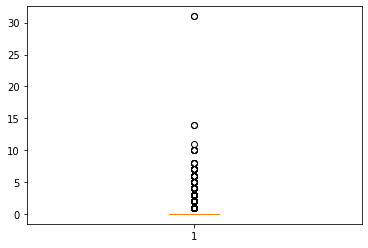

In [ ]:
plt.boxplot(Mor1.AE12M)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


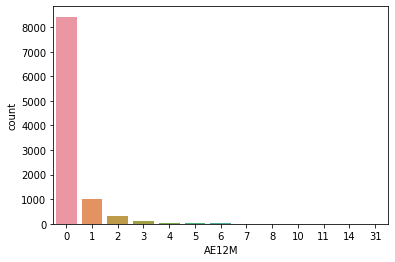

In [ ]:
sns.countplot(Mor1['AE12M'])

In [ ]:
Mor1['AE12M'].value_counts()

0     8422
1     1025
2      335
3      122
4       39
5       22
6       13
7        9
10       4
8        4
31       2
14       2
11       1
Name: AE12M, dtype: int64

((array([-3.81060943, -3.58545756, -3.46184782, ...,  3.46184782,
          3.58545756,  3.81060943]), array([ 0,  0,  0, ..., 14, 31, 31])),
 (0.493267098738532, 0.2640999999999999, 0.553388141008857))

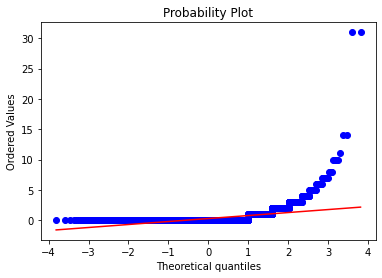

In [ ]:
stats.probplot(Mor1.AE12M, dist="norm",plot=pylab)

(array([9.638e+03, 2.480e+02, 7.100e+01, 2.400e+01, 1.000e+01, 4.000e+00,
        2.000e+00, 2.000e+00, 0.000e+00, 1.000e+00]),
 array([  0. ,  14.3,  28.6,  42.9,  57.2,  71.5,  85.8, 100.1, 114.4,
        128.7, 143. ]),
 <a list of 10 Patch objects>)

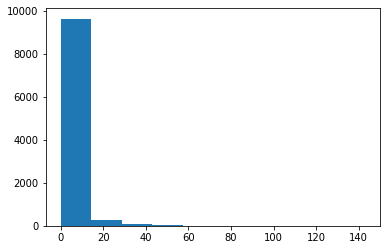

In [ ]:
plt.hist(Mor1.OP12M)

#Lasso Ridge Regression

In [ ]:
Mor1.shape

(10000, 76)

In [ ]:
Mor = Mor1.iloc[:,[75,1,2,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74]]

In [ ]:
Mor.describe()

,MORT_RISK,Gender,Age,IP12M,IPHIST,AE12M,OP12M,Ace,AF,Alcohol,Antagonist,Anticoag,Asthma,B12,Beta,BloodTest,BMI,BoneSparing,BP,Breathlessness,Calcium,Cancer,CardioVasc,Cervical,CervixRemoval,CHD,Cholesterol,CKD,Clopidogrel,Contraception,COPD,Dementia,Depression,Diabetes,Dipyridamole,DXA,Echocardiogram,Epilepsy,FEV1,FluVacc,FolateTests,Foot,Fracture,HF,Hypertension,IFCC,LiverTest,LVSD,MHealth,MicroAlb,MRI,Neuropathy,Osteoporosis,OTCsalic,OxygenSat,PAD,Palliative,PEFR,Pharmaco,Proteinuria,Renal,RheumArth,Salicylate,SerumChol,SerumCreat,SerumFructo,SerumLithium,Smoker,Statin,Stroke,Thyroid,TIA,TSH,Died_Status
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0
mean,0.005862,2.500200,38.788200,0.255200,0.554600,0.264100,2.21390,0.00830,0.013300,0.604900,0.004000,0.008000,0.115800,0.270100,0.00580,0.585400,0.684100,0.000900,0.6856,0.022100,0.3513,0.033400,0.246400,0.300300,0.014700,0.0184,0.397300,0.02130,0.006400,0.079600,0.030500,0.008700,0.102200,0.048200,0.003600,0.003900,0.072600,0.009000,0.049100,0.373300,0.257000,0.045800,0.005300,0.005700,0.103400,0.355000,0.523400,0.002000,0.012800,0.003000,0.095900,0.004200,0.015800,0.014400,0.081500,0.003100,0.007200,0.055100,0.0184,0.001400,0.542700,0.006400,0.01030,0.018800,0.532400,0.000400,0.001700,0.755800,0.002400,0.020000,0.484500,0.004500,0.484600,0.0
std,0.022700,0.500425,21.644482,1.936091,3.979071,0.891084,6.34435,0.09073,0.114562,0.488897,0.063122,0.089089,0.320001,0.444033,0.07594,0.492677,0.464897,0.029988,0.4643,0.147016,0.4774,0.179688,0.430936,0.458411,0.120355,0.1344,0.489364,0.14439,0.079748,0.270686,0.171967,0.092872,0.302926,0.214199,0.059895,0.062331,0.259492,0.094445,0.216088,0.483705,0.437001,0.209062,0.072612,0.075287,0.304496,0.478537,0.499477,0.044679,0.112416,0.054693,0.294469,0.064674,0.124707,0.119139,0.273615,0.055594,0.084551,0.228187,0.1344,0.037392,0.498198,0.079748,0.10097,0.135825,0.498974,0.019997,0.041198,0.429633,0.048933,0.140007,0.499785,0.066934,0.499788,0.0
min,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,2.000000,23.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000

In [ ]:
#Correlation Matrix
m = Mor.corr()

In [ ]:
m

,MORT_RISK,Gender,Age,IP12M,IPHIST,AE12M,OP12M,Ace,AF,Alcohol,Antagonist,Anticoag,Asthma,B12,Beta,BloodTest,BMI,BoneSparing,BP,Breathlessness,Calcium,Cancer,CardioVasc,Cervical,CervixRemoval,CHD,Cholesterol,CKD,Clopidogrel,Contraception,COPD,Dementia,Depression,Diabetes,Dipyridamole,DXA,Echocardiogram,Epilepsy,FEV1,FluVacc,FolateTests,Foot,Fracture,HF,Hypertension,IFCC,LiverTest,LVSD,MHealth,MicroAlb,MRI,Neuropathy,Osteoporosis,OTCsalic,OxygenSat,PAD,Palliative,PEFR,Pharmaco,Proteinuria,Renal,RheumArth,Salicylate,SerumChol,SerumCreat,SerumFructo,SerumLithium,Smoker,Statin,Stroke,Thyroid,TIA,TSH,Died_Status
MORT_RISK,1.000000,0.002733,0.399387,0.408226,0.243561,0.218866,0.312259,0.257236,0.325953,0.125531,0.221639,0.281112,0.113341,0.209464,0.184633,0.161101,0.113926,0.218284,0.138974,0.305758,0.206932,0.407496,0.054603,-0.005157,0.120651,0.264556,0.217911,0.430640,0.208721,-0.050917,0.251377,0.655969,0.087475,0.219295,0.150577,0.033439,0.260337,0.028041,0.233517,0.244091,0.212728,0.210090,0.223144,0.360352,0.320512,0.208245,0.180072,0.230786,0.096048,0.097360,0.178401,0.120317,0.231838,0.232246,0.222392,0.170700,0.658326,0.086019,0.058193,0.041469,0.175834,0.089691,0.215952,0.172104,0.179552,0.056966,0.016619,0.108479,0.183144,0.392609,0.179876,0.152273,0.179884,NaN
Gender,0.002733,1.000000,0.017510,0.014089,0.026413,0.018609,0.078313,-0.003341,-0.018363,0.047946,-0.012690,-0.002279,0.001729,0.171012,-0.010557,0.131764,0.073566,0.029978,0.103144,-0.006177,0.149363,0.015497,0.023423,0.651284,0.121998,-0.061021,0.052153,0.026931,-0.000032,0.293729,0.009807,0.041924,0.084971,-0.043941,0.009986,0.043260,0.025303,0.002078,0.016094,0.123848,0.165315,-0.045017,0.048136,-0.019939,0.005771,0.099516,0.107213,-0.017910,-0.003601,-0.007330,0.025999,-0.021657,0.088090,-0.020178,0.033845,-0.026983,0.011784,0.019609,-0.010464,-0.016049,0.110883,0.032546,-0.001030,0.008773,0.112921,-0.000008,0.007260,0.037440,0.016317,-0.010049,0.179355,0.001466,0.179554,NaN
Age,0.399387,0.017510,1.000000,0.104933,0.100048,0.037507,0.179260,0.153217,0.201145,0.566033,0.108737,0.151391,0.107057,0.356591,0.128582,0.491076,0.513266,0.059461,0.599064,0.201203,0.417043,0.251172,0.508660,0.297811,0.169694,0.214183,0.646329,0.278026,0.123966,0.016397,0.189039,0.205946,0.164451,0.281207,0.087839,0.093867,0.288707,0.021676,0.232838,0.326739,0.350067,0.279164,0.136255,0.138585,0.467421,0.522687,0.516331,0.083689,0.061946,0.088652,0.265796,0.094370,0.200613,0.199636,0.134196,0.102941,0.161445,0.089333,0.068689,0.046458,0.515485,0.095054,0.143501,0.202099,0.538549,0.020529,0.029228,0.571836,0.094717,0.241887,0.491029,0.111592,0.491185,NaN
IP12M,0.408226,0.014089,0.104933,1.000000,0.648477,0.234429,0.360764,0.068217,0.111398,0.055924,0.030927,0.120942,0.035590,0.081748,0.046389,0.070044,0.049242,0.061500,0.058893,0.086294,0.094512,0.204326,0.050607,0.021481,0.045703,0.066124,0.080972,0.096107,0.055490,0.001691,0.070338,0.082762,0.029702,0.089468,0.034336,0.014127,0.089325,0.022442,0.060885,0.107041,0.081696,0.089226,0.049424,0.064120,0.125218,0.082258,0.075629,0.050751,0.041968,0.013547,0.067758,0.027381,0.052058,0.084656,0.077406,0.040036,0.167169,0.039703,0.045369,0.019931,0.077248,0.050308,0.089383,0.039941,0.078814,0.005113,0.014622,0.041985,0.026259,0.137604,0.071270,0.037442,0.071243,NaN
IPHIST,0.243561,0.026413,0.100048,0.648477,1.000000,0.088153,0.190795,0.057057,0.147703,0.051987,0.038152,0.152243,0.035798,0.087285,0.038337,0.068583,0.045250,0.036047,0.054007,0.086067,0.091801,0.176071,0.052111,0.039451,0.047921,0.070120,0.081898,0.137667,0.046489,-0.006264,0.066332,0.070026,0.042498,0.052648,0.044076,0.015069,0.108323,0.033554,0.062541,0.111648,0.090107,0.054580,0.040016,0.062892,0.106856,0.082574,0.077253,0.047202,0.027056,0.015791,0.063174,0.029033,0.070213,0.042855,0.067149,0.045123,0.089794,0.025159,0.029539,0.006208,0.072859,0.039556,0.047514,0.043807,0.074666,-0.001531,0.021702,0.035471,0.031172,0.156376,0.077897,0.042823,0.077868,NaN
...,...,...,...,...,.

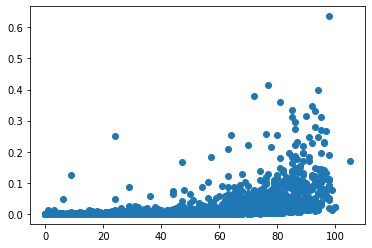

In [ ]:
#scatterplot
plt.scatter(x= Mor['Age'],y=Mor['MORT_RISK'])

<BarContainer object of 10000 artists>

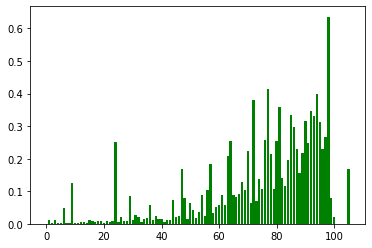

In [ ]:
plt.bar(x = Mor.Age,height = Mor.MORT_RISK,color = 'green')

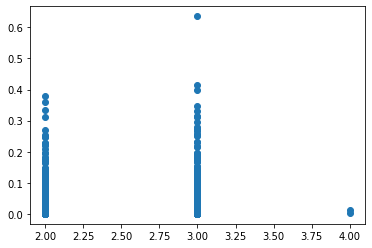

In [ ]:
plt.scatter(x= Mor['Gender'],y=Mor['MORT_RISK'])

<BarContainer object of 10000 artists>

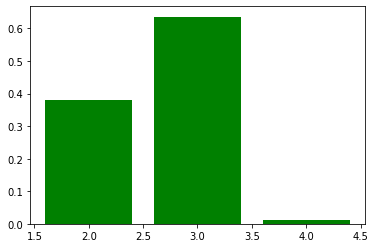

In [ ]:
plt.bar(x = Mor.Gender,height = Mor.MORT_RISK,color = 'green')

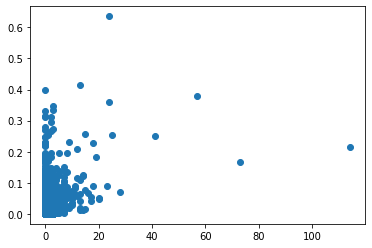

In [ ]:
plt.scatter(x= Mor['IP12M'],y=Mor['MORT_RISK'])

<BarContainer object of 10000 artists>

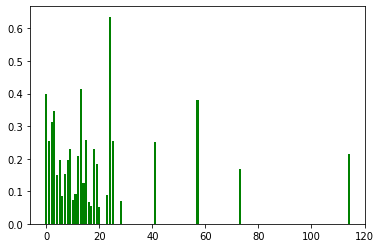

In [ ]:
plt.bar(x = Mor.IP12M,height = Mor.MORT_RISK,color = 'green')

<BarContainer object of 10000 artists>

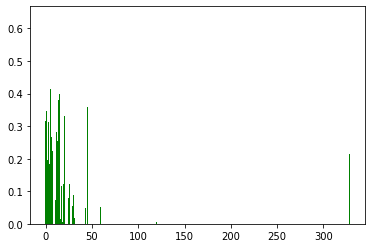

In [ ]:
plt.bar(x = Mor.IPHIST,height = Mor.MORT_RISK,color = 'green')

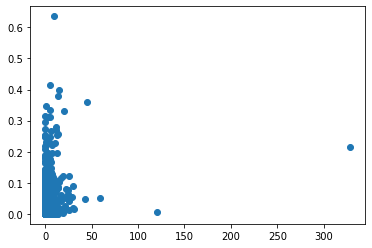

In [ ]:
plt.scatter(x= Mor['IPHIST'],y=Mor['MORT_RISK'])

<BarContainer object of 10000 artists>

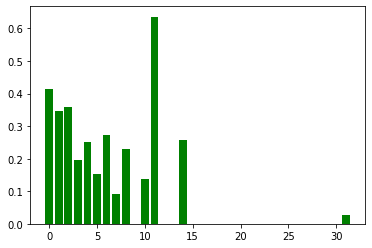

In [ ]:
plt.bar(x = Mor.AE12M,height = Mor.MORT_RISK,color = 'green')

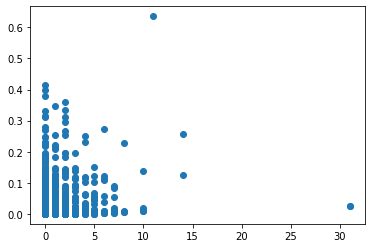

In [ ]:
plt.scatter(x= Mor['AE12M'],y=Mor['MORT_RISK'])

<BarContainer object of 10000 artists>

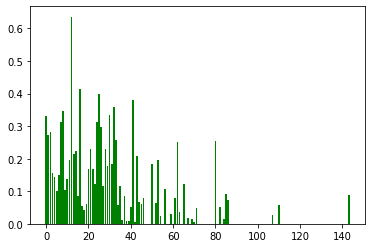

In [ ]:
plt.bar(x = Mor.OP12M,height = Mor.MORT_RISK,color = 'green')

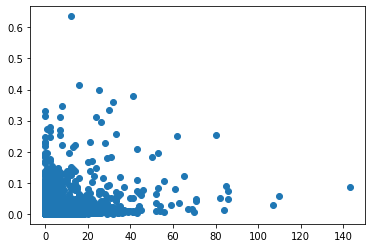

In [ ]:
plt.scatter(x= Mor['OP12M'],y=Mor['MORT_RISK'])

<BarContainer object of 10000 artists>

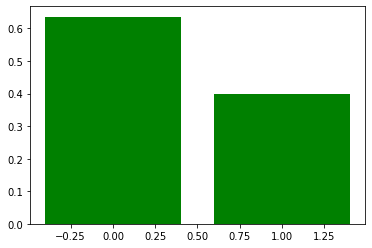

In [ ]:
plt.bar(x = Mor.Ace,height = Mor.MORT_RISK,color = 'green')

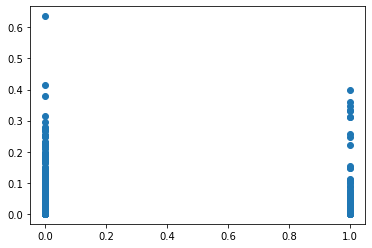

In [ ]:
plt.scatter(x= Mor['Ace'],y=Mor['MORT_RISK'])

<BarContainer object of 10000 artists>

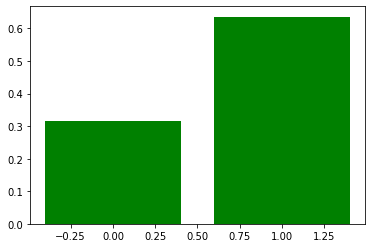

In [ ]:
plt.bar(x = Mor.Alcohol,height = Mor.MORT_RISK,color = 'green')

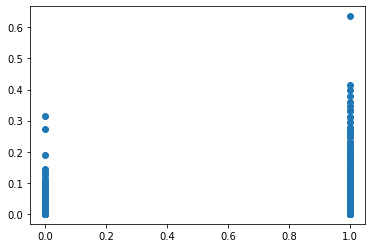

In [ ]:
plt.scatter(x= Mor['Alcohol'],y=Mor['MORT_RISK'])

<BarContainer object of 10000 artists>

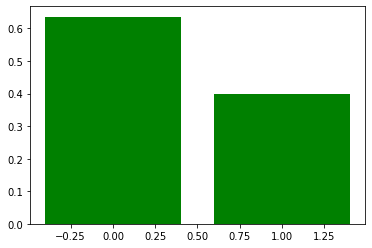

In [ ]:
plt.bar(x = Mor.AF,height = Mor.MORT_RISK,color = 'green')

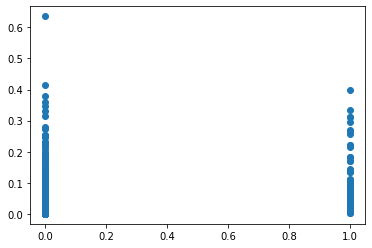

In [ ]:
plt.scatter(x= Mor['AF'],y=Mor['MORT_RISK'])

<BarContainer object of 10000 artists>

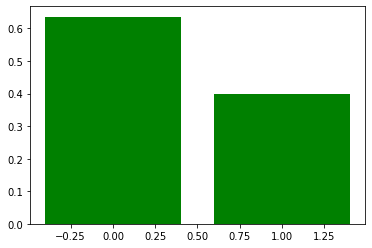

In [ ]:
plt.bar(x = Mor. Antagonist,height = Mor.MORT_RISK,color = 'green')

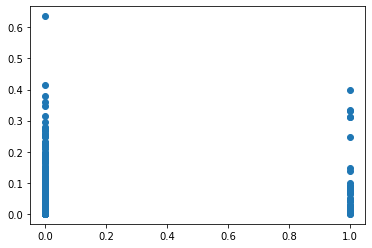

In [ ]:
plt.scatter(x= Mor['Antagonist'],y=Mor['MORT_RISK'])

<BarContainer object of 10000 artists>

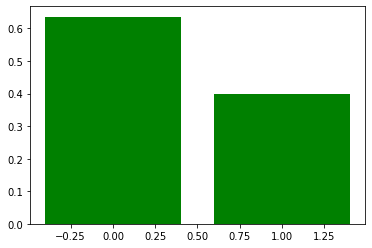

In [ ]:
plt.bar(x = Mor. Anticoag,height = Mor.MORT_RISK,color = 'green')

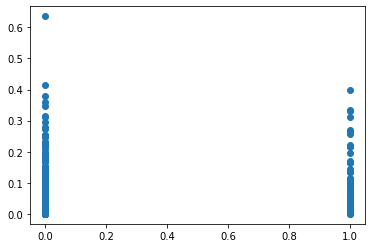

In [ ]:
plt.scatter(x= Mor['Anticoag'],y=Mor['MORT_RISK'])

<BarContainer object of 10000 artists>

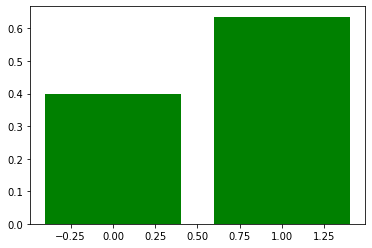

In [ ]:
plt.bar(x = Mor. Asthma,height = Mor.MORT_RISK,color = 'green')

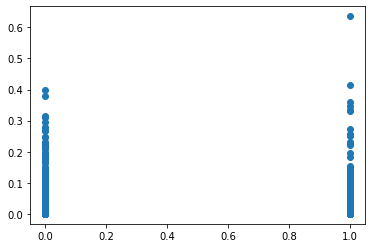

In [ ]:
plt.scatter(x= Mor['Asthma'],y=Mor['MORT_RISK'])

<BarContainer object of 10000 artists>

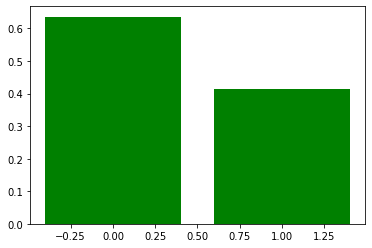

In [ ]:
plt.bar(x = Mor. B12,height = Mor.MORT_RISK,color = 'green')

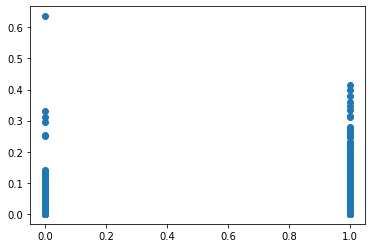

In [ ]:
plt.scatter(x= Mor['B12'],y=Mor['MORT_RISK'])

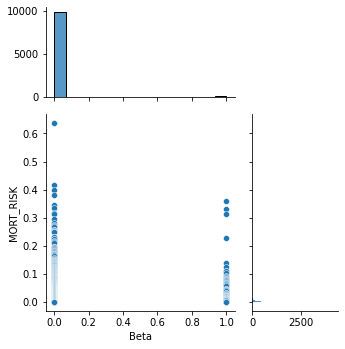

In [ ]:
sns.jointplot(data = Mor, x='Beta',y = 'MORT_RISK',height=5, ratio=2, marginal_ticks=True)

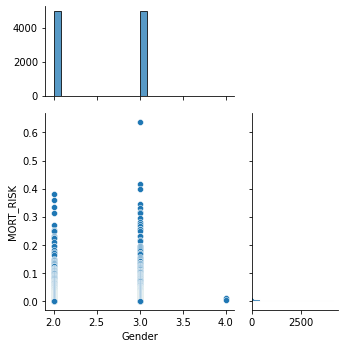

In [ ]:
sns.jointplot(data = Mor, x='Gender',y = 'MORT_RISK',height=5, ratio=2, marginal_ticks=True)

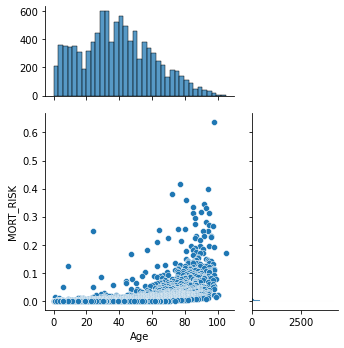

In [ ]:
sns.jointplot(data = Mor, x='Age',y = 'MORT_RISK',height=5, ratio=2, marginal_ticks=True)

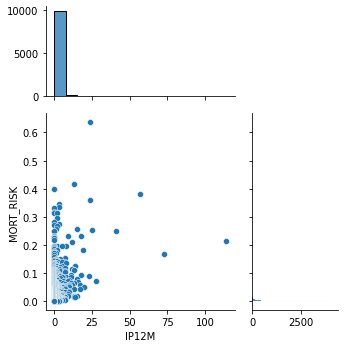

In [ ]:
sns.jointplot(data = Mor, x='IP12M',y = 'MORT_RISK',height=5, ratio=2, marginal_ticks=True)

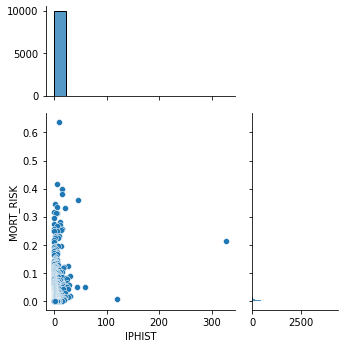

In [ ]:
sns.jointplot(data = Mor, x='IPHIST',y = 'MORT_RISK',height=5, ratio=2, marginal_ticks=True)

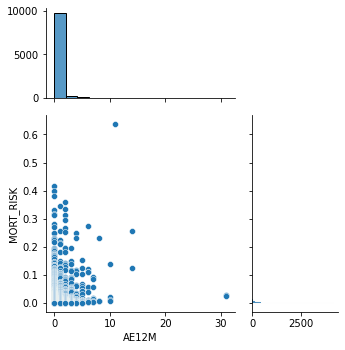

In [ ]:
sns.jointplot(data = Mor, x='AE12M',y = 'MORT_RISK',height=5, ratio=2, marginal_ticks=True)